# 3. a) Without missing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
filepath = "input.csv"

df = pd.read_csv(filepath, index_col = 0)
df = df.dropna(thresh=8) # drop rows with NaN values in any column 
df = df.sample(frac=1) # shuffle the rows
df.head()

,Regressor,Var1,Var2,Var3,Var4,Var5,Var6,Var7
Sl.No,,,,,,,,
330,27.9,4,156.0,105.0,2800,14.4,80,1
302,35.7,4,98.0,80.0,1915,14.4,79,1
303,27.4,4,121.0,80.0,2670,15.0,79,1
316,41.5,4,98.0,76.0,2144,14.7,80,2
173,13.0,8,302.0,129.0,3169,12.0,75,1


In [3]:
# assuming Y is always the column next to index

Y = df.iloc[:,0].copy().values
X = df.iloc[:,1:].copy().values

no_x = X.shape[1] # no of independent variables

limit = 70*df.shape[0]//100 # for selecting 70% of data

Y_train = np.array(Y[:limit])
Y_test = np.array(Y[limit:])

X = np.transpose(X)
X = np.array([(i - np.mean(i))/(np.max(i)-np.min(i)) for i in X]) # normalising

X = np.transpose(X)
X_train = np.transpose(X[:limit])
X_test = np.transpose(X[limit:])

In [4]:
learning_rate = 1
error = []
W = np.zeros(no_x)

for _ in range(1000):
    
    Y_ = np.matmul(W, X_train)
    
    mse = np.mean((Y_train - Y_)**2)
    error.append(mse) # for plotting

    ct = 2*(Y_train - Y_) # common term in derivative
    
    dL_dw = np.array([ np.mean(ct*x_js) for x_js in X_train]) 
    
    W =  W + learning_rate*dL_dw

print("train_error : "+str(mse))
print("weights : "+str(W))

train_error : 568.301202524
weights : [  2.10018718  14.97653418 -22.75171685 -26.13441081  -1.58762028
   7.7061416    1.71861206]


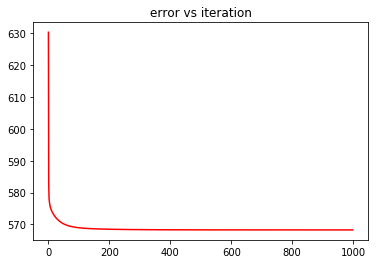

In [5]:
plt.plot(range(len(error[:])),error[:], color="red")
plt.title("error vs iteration")
plt.show()

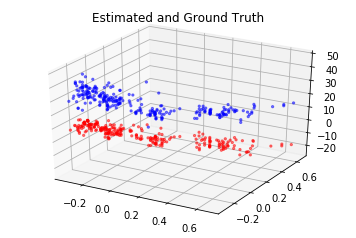

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

x1 = np.linspace(-1,1,100)
x2 = np.linspace(-1,1,100)
x1, x2 = np.meshgrid(x1,x2)

ax.scatter(X_train[1], X_train[2], Y_train, color= 'b', marker=".",alpha= 0.5)
ax.scatter(X_train[1], X_train[2], Y_, color= 'r',marker=".", alpha= 0.5)

plt.title("Estimated and Ground Truth")
plt.show()

In [7]:
Y_ = np.matmul(W, X_test)
test_error = np.mean((Y_test - Y_)**2)
print("test_error : "+str(test_error))

test_error : 554.789040205


#### Using Normal Equation

In [8]:
step_one = np.matmul(np.transpose(X),X)
step_two = np.linalg.inv(step_one)
step_three = np.matmul(step_two,np.transpose(X))
weights = np.matmul(step_three,Y)

In [9]:
Y_ = np.matmul(weights, X_test)
test_error = np.mean((Y_test - Y_)**2)
print("test_error : "+str(test_error))

test_error : 534.768514608


---




# 3. b) With missing data

#### Discuss briefly, the different ways in which you can think of estimating the missing values.

* Using measures of central tendencies i.e mean, median, mode. Something that would be more representative than median is respective quartile median


* The better and complex version is a predictive model. We first train the model with complete data and use the model to predict the missing data fields.


* Another version suggested was to use a nearest neighbours method, which looks for points which are similar in other fields and use its value to impute the missing field.

#### Evaluate two different methods of replacing missing data and report your results like in Task 1 for both.

Not using method 2 because model performed poorly on test data. And don't know how to implement third
So using mean and median as two types of imputation techniques

In [10]:
filepath = "input.csv"

df = pd.read_csv(filepath, index_col = 0)
df = df.fillna(value={"Regressor":np.median(Y), "Var3":np.median(np.transpose(X[2]))})
# df = df.fillna(value={"Regressor":np.mean(Y), "Var3":np.mean(np.transpose(X[2]))})
df = df.sample(frac=1) # shuffle the rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 368 to 40
Data columns (total 8 columns):
Regressor    406 non-null float64
Var1         406 non-null int64
Var2         406 non-null float64
Var3         406 non-null float64
Var4         406 non-null int64
Var5         406 non-null float64
Var6         406 non-null int64
Var7         406 non-null int64
dtypes: float64(4), int64(4)
memory usage: 28.5 KB


In [11]:
Y = df.iloc[:,0].copy().values
X = df.iloc[:,1:].copy().values

no_x = X.shape[1] # no of independent variables

limit = 70*df.shape[0]//100 # for selecting 70% of data

Y_train = np.array(Y[:limit])
Y_test = np.array(Y[limit:])

X = np.transpose(X)
X = np.array([(i - np.mean(i))/(np.max(i)-np.min(i)) for i in X]) # normalising

X = np.transpose(X)
X_train = np.transpose(X[:limit])
X_test = np.transpose(X[limit:])

In [12]:
learning_rate = 1
error = []
W = np.zeros(no_x)

for _ in range(1000):
    
    Y_ = np.matmul(W, X_train)
    
    mse = np.mean((Y_train - Y_)**2)
    error.append(mse) # for plotting

    ct = 2*(Y_train - Y_) # common term in derivative
    
    dL_dw = np.array([ np.mean(ct*x_js) for x_js in X_train]) 
    
    W =  W + learning_rate*dL_dw

print("train_error : "+str(mse))
print("weights : "+str(W))

train_error : 562.569254211
weights : [  2.13334273   3.2942516    2.35084518 -24.74698544  10.29709002
   7.65559421   1.19337169]


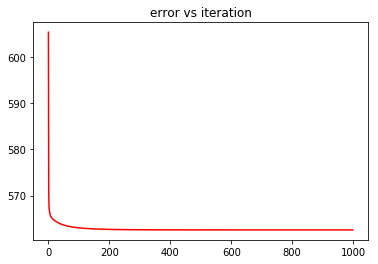

In [13]:
plt.plot(range(len(error[:])),error[:], color="red")
plt.title("error vs iteration")
plt.show()

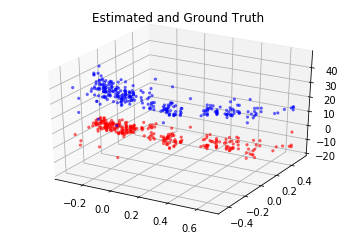

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

x1 = np.linspace(-1,1,100)
x2 = np.linspace(-1,1,100)
x1, x2 = np.meshgrid(x1,x2)

ax.scatter(X_train[1], X_train[2], Y_train, color= 'b', marker=".",alpha= 0.5)
ax.scatter(X_train[1], X_train[2], Y_, color= 'r',marker=".", alpha= 0.5)

plt.title("Estimated and Ground Truth")
plt.show()

In [15]:
Y_ = np.matmul(W, X_test)
test_error = np.mean((Y_test - Y_)**2)
print("test_error with median : "+str(test_error))

test_error with median : 575.139342792


In [16]:
Y_ = np.matmul(W, X_test)
test_error = np.mean((Y_test - Y_)**2)
print("test_error with mean fill : "+str(test_error))

test_error with mean fill : 575.139342792


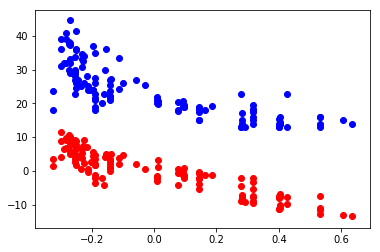

In [19]:
plt.scatter(X_test[1],Y_test,color='b')
plt.scatter(X_test[1],Y_,color='r')
plt.show()